In [2]:

import pandas as pd # For data manipulation
import glob # to read all the files at once
import os # Get the current working directory
import dill # For saving and loading Python objects
import matplotlib.pyplot as plt # For plotting
import seaborn as sns

In [3]:
os.chdir('/Users/daniil/Library/CloudStorage/OneDrive-IndianaUniversity/Documents/Experiments/IU/Memorability Rocks/Exp1/Exp1_analysis') # Change to the directory where the data is stored

In [ ]:
# Load and automatically restore all variables to global namespace
with open("Exp1_analysis.pkl", "rb") as f:
    loaded_vars = dill.load(f)
    globals().update(loaded_vars)

print(f"Loaded {len(loaded_vars)} variables:", list(loaded_vars.keys()))

In [6]:
# Read Data

# Path to your Data folder
data_folder = 'Data'

# Get all JSON files in the folder
files = glob.glob(os.path.join(data_folder, '*.json'))

# Read and concatenate all files
data_frames = [pd.read_json(file) for file in files]
data_set = pd.concat(data_frames, ignore_index=True)
data_set.head(10)

,width,height,webaudio,browser,browser_version,mobile,os,fullscreen,vsync_rate,webcam,...,task,broad_category,image_png,image_id,category_name,category,distinct_rating,correct_response,item_type,cor_ans
0,1912.0,954.0,1.0,edge-chromium,139.0.0,0.0,Windows 10,1.0,60.13,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,memory_phase,I,I_Rhyolite_13.png,157.0,Rhyolite,10.0,4.83,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,memory_phase,M,M_Anthracite_09.png,185.0,Anthracite,12.0,4.76,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Memory phase data
filtered_data_memory = data_set.loc[
    data_set['task'] == 'memory_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'category_name','category','broad_category',
     'image_png','image_id','distinct_rating']
    ].copy()
filtered_data_memory = filtered_data_memory.astype({
    "subject_id": "category", "broad_category": "category",
    "image_id": "int", "category_name": "category",
    "category": "int"
    })
filtered_data_memory.head(10)

,trial_index,subject_id,group,task,item_type,category_name,category,broad_category,image_png,image_id,distinct_rating
6,6,qz92mgdn,Group1,memory_phase,NaN,Rhyolite,10,I,I_Rhyolite_13.png,157,4.83
8,8,qz92mgdn,Group1,memory_phase,NaN,Anthracite,12,M,M_Anthracite_09.png,185,4.76
10,10,qz92mgdn,Group1,memory_phase,NaN,Bituminous Coal,21,S,S_Bituminous Coal_15.png,335,3.21
12,12,qz92mgdn,Group1,memory_phase,NaN,Amphibolite,11,M,M_Amphibolite_03.png,163,6.58
14,14,qz92mgdn,Group1,memory_phase,NaN,Pegmatite,7,I,I_Pegmatite_04.png,100,5.03
16,16,qz92mgdn,Group1,memory_phase,NaN,Anthracite,12,M,M_Anthracite_11.png,187,4.38
18,18,qz92mgdn,Group1,memory_phase,NaN,Basalt,2,I,I_Basalt_02.png,18,1.84
20,20,qz92mgdn,Group1,memory_phase,NaN,Micrite,26,S,S_Micrite_09.png,409,2.70
22,22,qz92mgdn,Group1,memory_phase,NaN,Hornfels,14,M,M_Hornfels_12.png,220,2.62
24,24,qz92mgdn,Group1,memory_phase,NaN,Andesite,1,I,I_Andesite_01.png,1,3.99


In [8]:
# Test phase data
filtered_data_test = data_set.loc[
    data_set['task'] == 'test_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'response','correct_response', 'cor_ans','rt', 
     'category_name', 'category','broad_category',
     'image_png', 'image_id', 'distinct_rating']
    ].copy()
filtered_data_test = filtered_data_test.astype({
    "subject_id": "category",
    "group": "category",
    'item_type': "category",
    "broad_category": "category",
    "image_id": "int",
    "category_name": "category",
    "category": "int",
    "cor_ans": "bool"
    })

filtered_data_test.head(10)

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating
490,490,qz92mgdn,Group1,test_phase,Target,l,l,True,5983.0,Shale,30,S,S_Shale_11.png,475,4.05
492,492,qz92mgdn,Group1,test_phase,Target,a,l,False,1425.0,Slate,20,M,M_Slate_06.png,310,2.86
494,494,qz92mgdn,Group1,test_phase,Target,a,l,False,998.0,Pegmatite,7,I,I_Pegmatite_09.png,105,6.37
496,496,qz92mgdn,Group1,test_phase,Target,l,l,True,755.0,Pumice,9,I,I_Pumice_12.png,140,2.97
498,498,qz92mgdn,Group1,test_phase,Target,a,l,False,840.0,Peridotite,8,I,I_Peridotite_11.png,123,3.59
500,500,qz92mgdn,Group1,test_phase,Target,a,l,False,544.0,Andesite,1,I,I_Andesite_01.png,1,3.99
502,502,qz92mgdn,Group1,test_phase,Target,a,l,False,555.0,Quartzite,18,M,M_Quartzite_08.png,280,2.15
504,504,qz92mgdn,Group1,test_phase,Foil,l,a,False,612.0,Rock Salt,28,S,S_Rock Salt_01.png,433,7.18
506,506,qz92mgdn,Group1,test_phase,Foil,a,a,True,514.0,Pegmatite,7,I,I_Pegmatite_14.png,110,4.79
508,508,qz92mgdn,Group1,test_phase,Target,a,l,False,814.0,Andesite,1,I,I_Andesite_07.png,7,4.81


------------ Ниже просто балуемся ------------

In [9]:
# group and calculate the mean by category and item_type
gr_cat_df = (
    filtered_data_test
    .groupby(['category_name','item_type'], observed=True)[['cor_ans']]
    .mean()
    .unstack() # seaparate item_type into columns
    .reset_index()
)
# rename columns for clarity
gr_cat_df.columns = [
    "category_name" if col[0] == "category_name" else f"prop_{col[1]}"
    for col in gr_cat_df.columns
]
# long format for easier plotting
gr_cat_df_long = pd.melt(
    gr_cat_df,
    id_vars=['category_name'],
    value_vars=[col for col in gr_cat_df.columns if col.startswith('prop_')],
    var_name='item_type',
    value_name='prop_correct'
)

gr_cat_df_long

,category_name,item_type,prop_correct
0,Amphibolite,prop_Foil,0.375
1,Andesite,prop_Foil,0.250
2,Anthracite,prop_Foil,0.250
3,Basalt,prop_Foil,0.125
4,Bituminous Coal,prop_Foil,0.250
5,Breccia,prop_Foil,0.125
6,Chert,prop_Foil,0.000
7,Conglomerate,prop_Foil,0.125
8,Diorite,prop_Foil,0.125
9,Dolomite,prop_Foil,0.250


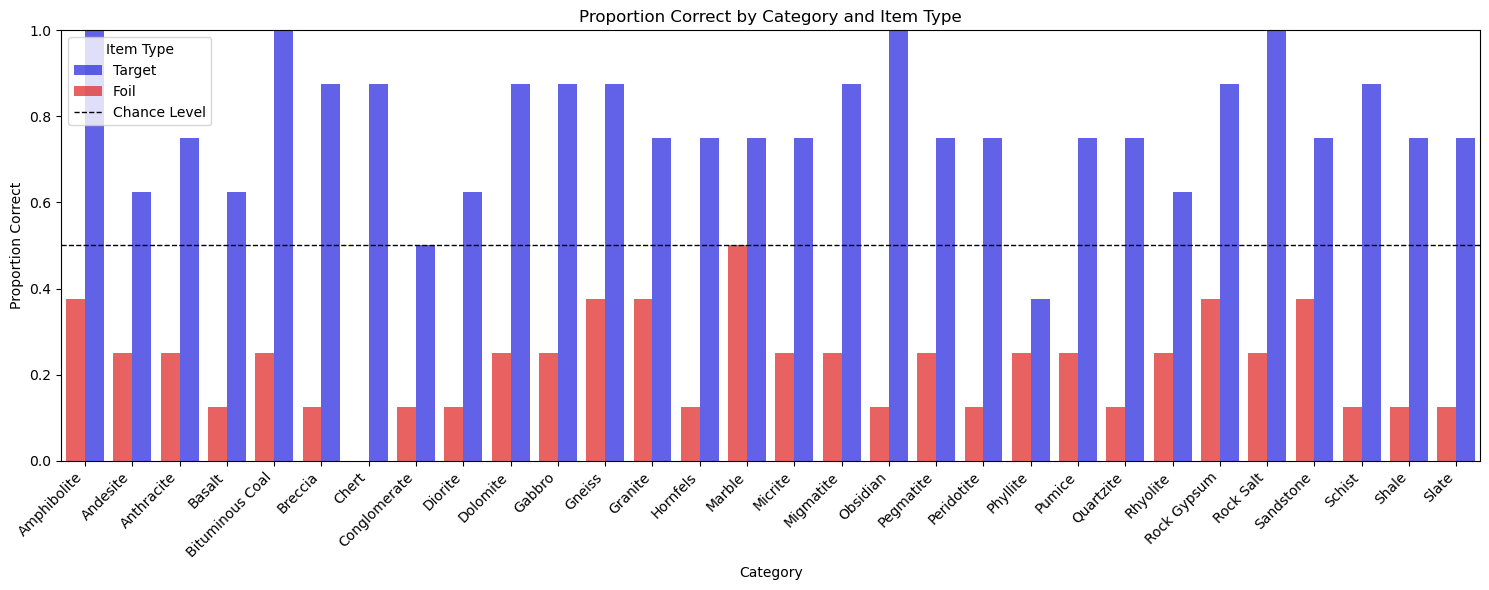

In [10]:
plt.figure(figsize=(15,6))
sns.barplot(
    data=gr_cat_df_long,
    x="category_name",
    y="prop_correct",
    hue="item_type",
    palette=["red","blue"],
    alpha=0.7
)
plt.axhline(0.5, color='black', linestyle='--', linewidth=1, label='Chance Level')

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.xlabel("Category")
plt.ylabel("Proportion Correct")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in [1,0,2]], 
           ['Target', 'Foil', 'Chance Level'],
           loc='upper left', title='Item Type')

plt.title("Proportion Correct by Category and Item Type")
plt.tight_layout()
plt.show()

In [129]:
# Save only the variables you actually need
variables_to_save = {
    'gr_cat_df_long': gr_cat_df_long,
    'filtered_data_memory': filtered_data_memory,
    'filtered_data_test': filtered_data_test,
    'data_set': data_set,
    # Add other variables you want to keep
}

with open("Exp1_analysis.pkl", "wb") as f:
    dill.dump(variables_to_save, f)